In [100]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A tabela disponivel em: https://www.kaggle.com/datasets/josevitormichelin/brazilian-football-championship-brasileiro possuia apenas dados até 2019 enquanto nossa tabela com o dados das partidas disponivel em: https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol possuia até 2022. Então completei os dados da tabela de ranking utilizando informações disponíveis no site da CBF: https://www.cbf.com.br/.

Planilhas atualizadas com dados até 2022:
https://drive.google.com/drive/folders/1hCpd91iioJM1A8sHTVn1yYbswzpck7XR?usp=sharing

In [102]:
ranking = pd.read_csv("/content/drive/MyDrive/IA_FUTEBOL_DADOS/dataset-2003-2022.csv", sep=',') # lendo a tabela 

ranking['team'] = ranking['team'].str.strip() # tirando espaço em branco dos nomes dos times

# padronizando nomes das duas bases de dados
ranking['team'] = ranking['team'].str.replace('América Mineiro','America-MG')
ranking['team'] = ranking['team'].str.replace('América-MG','America-MG')
ranking['team'] = ranking['team'].str.replace('Athletico Paranaense','Athletico-PR')
ranking['team'] = ranking['team'].str.replace('Athlético Paranaense','Athletico-PR')
ranking['team'] = ranking['team'].str.replace('Atlético Paranaense','Athletico-PR')
ranking['team'] = ranking['team'].str.replace('Atlético Mineiro','Atletico-MG')
ranking['team'] = ranking['team'].str.replace('Atlético Goianiense','Atletico-GO')
ranking['team'] = ranking['team'].str.replace('Avaí','Avai')
ranking['team'] = ranking['team'].str.replace('Ceará','Ceara')
ranking['team'] = ranking['team'].str.replace('Criciúma','Criciuma')
ranking['team'] = ranking['team'].str.replace('Cuiabá','Cuiaba')
ranking['team'] = ranking['team'].str.replace('Goiás','Goias')
ranking['team'] = ranking['team'].str.replace('Grêmio','Gremio')
ranking['team'] = ranking['team'].str.replace('Paraná','Parana')
ranking['team'] = ranking['team'].str.replace('São Paulo','Sao Paulo')
ranking['team'] = ranking['team'].str.replace('Vasco da Gama','Vasco')
ranking['team'] = ranking['team'].str.replace('Vitória','Vitoria')


filtro_campeao = ranking['position'] == 1 # filtro somente dos campeoes
filtro_vice = ranking['position'] == 2 # filtro dos vices

vencedores = ranking[filtro_campeao] # tabela campeoes
vice = ranking[filtro_vice] # tabela vices

ranking

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72
1,2003,2,Santos,87,46,25,12,9,93,60,33,63
2,2003,3,Sao Paulo,78,46,22,12,12,81,67,14,56
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52
...,...,...,...,...,...,...,...,...,...,...,...,...
405,2022,16,Cuiaba,41,38,10,11,17,31,42,-11,35
406,2022,17,Ceara,37,38,7,16,15,34,41,-7,32
407,2022,18,Atletico-GO,36,38,8,12,18,39,57,-18,31
408,2022,19,Avai,35,38,9,8,21,34,60,-26,30


In [103]:
vice

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
1,2003,2,Santos,87,46,25,12,9,93,60,33,63
25,2004,2,Athletico-PR,86,46,25,11,10,93,56,37,62
49,2005,2,Internacional,78,42,23,9,10,72,49,23,61
71,2006,2,Internacional,69,38,20,9,9,52,36,16,61
91,2007,2,Santos,62,38,19,5,14,57,47,10,54
111,2008,2,Gremio,72,38,21,9,8,59,35,24,63
131,2009,2,Internacional,65,38,19,8,11,65,44,21,57
151,2010,2,Cruzeiro,69,38,20,9,9,53,38,15,61
171,2011,2,Vasco,69,38,19,12,7,57,40,17,60
191,2012,2,Atletico-MG,72,38,20,12,6,64,37,27,63


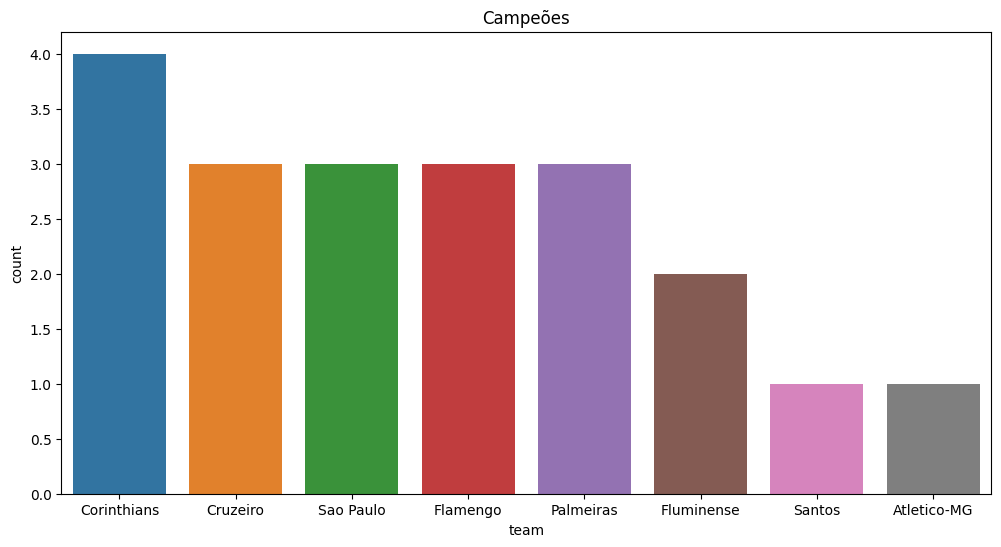

In [104]:
plt.figure(figsize=(12,6))
plt.title("Campeões")
sns.countplot(data=vencedores, x='team',order=vencedores['team'].value_counts().index)
plt.show()

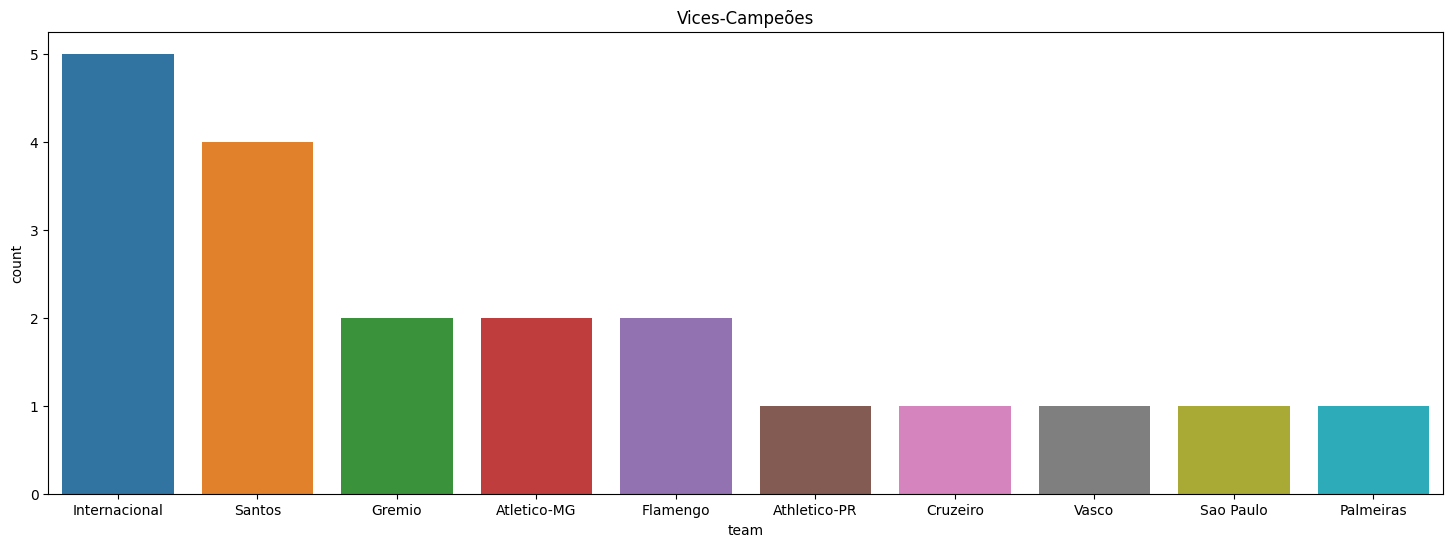

In [105]:
plt.figure(figsize=(18,6))
plt.title("Vices-Campeões")
sns.countplot(data=vice, x='team',order=vice['team'].value_counts().index)
plt.show()

In [106]:
equipes = {} # dicionario que cria um numero (index) para cada nome de time
index = 0

for idx, row in ranking.iterrows():
  name = row['team']
  if(name not in equipes.keys()):
    equipes[name] = index
    index += 1
dict(sorted(equipes.items()))

{'America-MG': 39,
 'América de Natal': 30,
 'Athletico-PR': 11,
 'Atletico-GO': 37,
 'Atletico-MG': 6,
 'Avai': 33,
 'Bahia': 23,
 'Botafogo': 25,
 'Bragantino': 43,
 'Brasiliense': 26,
 'CSA': 42,
 'Ceara': 36,
 'Chapecoense': 40,
 'Corinthians': 14,
 'Coritiba': 4,
 'Criciuma': 13,
 'Cruzeiro': 0,
 'Cuiaba': 44,
 'Figueirense': 10,
 'Flamengo': 7,
 'Fluminense': 18,
 'Fortaleza': 22,
 'Goias': 8,
 'Gremio': 19,
 'Gremio Barueri': 34,
 'Gremio Prudente': 38,
 'Guarani': 12,
 'Internacional': 5,
 'Ipatinga': 32,
 'Joinville': 41,
 'Juventude': 17,
 'Náutico': 29,
 'Palmeiras': 24,
 'Parana': 9,
 'Paysandu': 21,
 'Ponte Preta': 20,
 'Portuguesa': 31,
 'Santa Cruz': 27,
 'Santo André': 35,
 'Santos': 1,
 'Sao Paulo': 2,
 'Sport': 28,
 'São Caetano': 3,
 'Vasco': 16,
 'Vitoria': 15}

In [107]:
campeoes = vencedores['team'].value_counts()
campeoes

Corinthians    4
Cruzeiro       3
Sao Paulo      3
Flamengo       3
Palmeiras      3
Fluminense     2
Santos         1
Atletico-MG    1
Name: team, dtype: int64

In [108]:
def alterar_nome_id(df): # funcao para alterar o nome do time pelo index gerado
  df['team'] = equipes[df['team']]
  return df

ranking_id = ranking.apply(alterar_nome_id, axis='columns') # aplica a funcao de alterar nome
ranking_id

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
0,2003,1,0,100,46,31,7,8,102,47,55,72
1,2003,2,1,87,46,25,12,9,93,60,33,63
2,2003,3,2,78,46,22,12,12,81,67,14,56
3,2003,4,3,74,46,19,14,13,53,37,16,53
4,2003,5,4,73,46,21,10,15,67,58,9,52
...,...,...,...,...,...,...,...,...,...,...,...,...
405,2022,16,44,41,38,10,11,17,31,42,-11,35
406,2022,17,36,37,38,7,16,15,34,41,-7,32
407,2022,18,37,36,38,8,12,18,39,57,-18,31
408,2022,19,33,35,38,9,8,21,34,60,-26,30


In [109]:
# implementando os modelos de machine learning

from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [110]:
X = ranking_id.drop(['position','year','goals_difference','games'], axis = 1) # dropando colunas que não importam
y = ranking_id['position'] # posicao

X

,team,points,victories,draws,losses,goals_scored,goals_against,perc_points_won
0,0,100,31,7,8,102,47,72
1,1,87,25,12,9,93,60,63
2,2,78,22,12,12,81,67,56
3,3,74,19,14,13,53,37,53
4,4,73,21,10,15,67,58,52
...,...,...,...,...,...,...,...,...
405,44,41,10,11,17,31,42,35
406,36,37,7,16,15,34,41,32
407,37,36,8,12,18,39,57,31
408,33,35,9,8,21,34,60,30


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47) # separando o modelo em treino e teste

In [112]:
# carregando os modelos
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors = 1)
random_forest_model = RandomForestClassifier()

In [113]:
# treinando os modelos
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# salvando a predição de cada modelo
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

In [115]:
# printando resultados obtidos
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_test, y_pred_tree)) # 29%
    print(classification_report(y_test, y_pred_knn)) # 18%
    print(classification_report(y_test, y_pred_forest)) # 27%

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         5
           4       0.50      0.20      0.29         5
           5       0.11      0.33      0.17         3
           6       0.33      0.12      0.18         8
           7       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         3
           9       0.20      0.17      0.18         6
          10       0.36      0.67      0.47         6
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.25      0.17      0.20         6
          14       0.00      0.00      0.00         1
          15       0.25      0.33      0.29         3
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         3
          18       0.00    

Agora tentarei criar um modelo utilizando uma base de dados com estatisticas de cada partida

In [116]:
from sklearn.utils import shuffle # embaralhar dados
from xgboost import XGBClassifier # modelo de previsao XGboost
from sklearn.metrics import confusion_matrix # matriz de confusao

In [117]:
# importa dados das planilhas de partidas
matches = pd.read_csv("/content/drive/MyDrive/IA_FUTEBOL_DADOS/campeonato-brasileiro-full.csv") 
gols = pd.read_csv("/content/drive/MyDrive/IA_FUTEBOL_DADOS/campeonato-brasileiro-gols.csv")

matches['data'] = pd.to_datetime(matches['data'], format='%d/%m/%Y') # formata a data
filtro = (matches['data'] > '2003-01-01') & (matches['data'] < '2022-12-31') # filtr de dados de 2003 a 2022 para ficar compativel com nossa base de ranking

# group by das planilhas

##count = gols.groupby(['partida_id','clube']).size()
##matches['gols_mandante'] = matches[['ID','mandante']].apply(lambda x: count.get((x['ID'], x['mandante']), 0), axis=1)
##matches['gols_visitante'] = matches[['ID','visitante']].apply(lambda x: count.get((x['ID'], x['visitante']), 0), axis=1)


matches = matches[filtro] # aplica o filtro de data
matches = matches.dropna() # dropa dados vazios

matches

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
4729,4741,13,2014-08-03,16:00,Chapecoense,Flamengo,4-4-2,4-2-3-1,C. Rodrigues,V. Luxemburgo da Silva,Chapecoense,Arena Condá,1,0,SC,RJ
4797,4808,20,2014-09-10,19:30,Palmeiras,Criciuma,4-2-2-2,4-2-3-1,D. Silvestre Júnior,G. Dal Pozzo,Palmeiras,Estádio Municipal Paulo Machado de Carvalho,1,0,SP,SC
4822,4833,22,2014-09-17,22:00,Coritiba,Sao Paulo,4-3-2-1,4-4-2,M. dos Santos Gonçalves,M. Ramalho,Coritiba,Couto Pereira,3,1,PR,SP
4835,4846,23,2014-09-21,18:30,Gremio,Chapecoense,4-1-4-1,4-2-3-1,L. Scolari,J. da Silva,Gremio,Arena do Grêmio,1,0,RS,SC
4842,4853,24,2014-09-24,22:00,Fluminense,Gremio,4-2-3-1,4-1-4-1,C. Borges dos Santos,L. Scolari,-,Maracanã,0,0,RJ,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,2022-11-13,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR
8021,8022,38,2022-11-13,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,2022-11-13,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG
8023,8024,38,2022-11-13,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP


In [118]:
# funcao pra criar um index pro nome do time
def index_nome_team(df):
  equipes = {}
  index = 0

  for idx, row in df.iterrows():
    name = row['mandante']
    if(name not in equipes.keys()):
      equipes[name] = index
      index += 1
    name = row['visitante']
    if(name not in equipes.keys()):
      equipes[name] = index
      index += 1
  return equipes

In [119]:
equipes = index_nome_team(matches)
dict(sorted(equipes.items()))


{'America-MG': 25,
 'Athletico-PR': 11,
 'Atletico-GO': 26,
 'Atletico-MG': 8,
 'Avai': 21,
 'Bahia': 16,
 'Botafogo-RJ': 24,
 'Bragantino': 31,
 'CSA': 29,
 'Ceara': 27,
 'Chapecoense': 0,
 'Corinthians': 14,
 'Coritiba': 4,
 'Criciuma': 3,
 'Cruzeiro': 19,
 'Cuiaba': 32,
 'Figueirense': 13,
 'Flamengo': 1,
 'Fluminense': 7,
 'Fortaleza': 30,
 'Goias': 12,
 'Gremio': 6,
 'Internacional': 10,
 'Joinville': 17,
 'Juventude': 33,
 'Palmeiras': 2,
 'Parana': 28,
 'Ponte Preta': 18,
 'Santa Cruz': 23,
 'Santos': 9,
 'Sao Paulo': 5,
 'Sport': 20,
 'Vasco': 22,
 'Vitoria': 15}

In [120]:
# limpando base
matches_clear = matches.drop(['ID','data','hora','arena', 
                              'formacao_mandante', 'formacao_visitante', 
                              'tecnico_mandante','tecnico_visitante', 
                              'mandante_Estado', 'visitante_Estado','rodata'], axis = 1) 
# tabela limpa
matches_clear

,mandante,visitante,vencedor,mandante_Placar,visitante_Placar
4729,Chapecoense,Flamengo,Chapecoense,1,0
4797,Palmeiras,Criciuma,Palmeiras,1,0
4822,Coritiba,Sao Paulo,Coritiba,3,1
4835,Gremio,Chapecoense,Gremio,1,0
4842,Fluminense,Gremio,-,0,0
...,...,...,...,...,...
8020,Cuiaba,Coritiba,Cuiaba,2,1
8021,Bragantino,Fluminense,Fluminense,0,1
8022,Corinthians,Atletico-MG,Atletico-MG,0,1
8023,Internacional,Palmeiras,Internacional,3,0


In [121]:
campeoes

Corinthians    4
Cruzeiro       3
Sao Paulo      3
Flamengo       3
Palmeiras      3
Fluminense     2
Santos         1
Atletico-MG    1
Name: team, dtype: int64

In [122]:
# adicionando colunas de vitoria do mandante de visitante
matches_clear['mandante_vitorias'] = 0
matches_clear['visitante_vitorias'] = 0

# contador de vitorias (titulo do campeonato), verifica na tabela de ranking quantos anos o time ficou no primeiro lugar
def count_vitorias(df):
  if(campeoes.get(df['mandante'])!= None ):
    df['mandante_vitorias'] = campeoes.get(df['mandante'])
  if(campeoes.get(df['visitante'])!= None ):
    df['visitante_vitorias'] = campeoes.get(df['visitante'])
  return df


In [123]:
matches_clear = matches_clear.apply(count_vitorias, axis='columns')
matches_clear

,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_vitorias,visitante_vitorias
4729,Chapecoense,Flamengo,Chapecoense,1,0,0,3
4797,Palmeiras,Criciuma,Palmeiras,1,0,3,0
4822,Coritiba,Sao Paulo,Coritiba,3,1,0,3
4835,Gremio,Chapecoense,Gremio,1,0,0,0
4842,Fluminense,Gremio,-,0,0,2,0
...,...,...,...,...,...,...,...
8020,Cuiaba,Coritiba,Cuiaba,2,1,0,0
8021,Bragantino,Fluminense,Fluminense,0,1,0,2
8022,Corinthians,Atletico-MG,Atletico-MG,0,1,4,1
8023,Internacional,Palmeiras,Internacional,3,0,0,3


In [124]:
# altera o nome pelo index
def alterar_nome_index(df):
  # se o mandante venceu = 1
  # se o visitante venceu = 2
  # se empate = 0
  if(df['vencedor'] == df['mandante']):
      df['vencedor'] = 1
  elif(df['vencedor'] == df['visitante']):
      df['vencedor'] = 2
  else:
      df['vencedor'] = 0

  # troca o nome do time pelo indice
  df['mandante'] = equipes[df['mandante']]
  df['visitante'] = equipes[df['visitante']]



  return df

# aplica a funcao na tabela matches_clear
matches_id = matches_clear.apply(alterar_nome_index, axis='columns')
matches_id

,mandante,visitante,vencedor,mandante_Placar,visitante_Placar,mandante_vitorias,visitante_vitorias
4729,0,1,1,1,0,0,3
4797,2,3,1,1,0,3,0
4822,4,5,1,3,1,0,3
4835,6,0,1,1,0,0,0
4842,7,6,0,0,0,2,0
...,...,...,...,...,...,...,...
8020,32,4,1,2,1,0,0
8021,31,7,2,0,1,0,2
8022,14,8,2,0,1,4,1
8023,10,2,1,3,0,0,3


In [125]:
# realizando o recorte da base, : (todas as linhas), das colunas []
# funcao loc realiza um recorte do dataframa a das linhas e colunas
X = matches_id.loc[:,['mandante','visitante','mandante_vitorias','visitante_vitorias']]

# convertendo o dataframe em um vetor array do tipo float para aplicar funcoes da lib NumPy
X = np.array(X).astype('float64')

_X = X.copy() # copia dos dados
# inverte a primeira e a segunda coluna
_X[:,0] = X[:,1]
_X[:,1] = X[:,0]
# inverte a terceira e a quarta coluna
_X[:,2] = X[:,3]
_X[:,3] = X[:,2]

# funcao loc para recortar todas as linhas da coluna vencedor
y = matches_id.loc[:,['vencedor']]
# transforma o dataframe em um array NumPy do tipo INT (pois so possui 0,1,2)
y = np.array(y).astype('int') # matriz de um coluna e varias linhas 
# transforma a matriz coluna em matriz linha
y = np.reshape(y,(1,3048)) # matriz de uma linha e varias colunas
# transforma y em um array unidimensional, vetor de varias posicoes
y = y[0]

# cria um copia de y
_y = y.copy() 

# inverto a resposta da copia do y
for i in range(len(_y)):
  if(_y[i] == 1):
    _y[i] = 2
  elif(_y[i] == 2):
    _y[i] = 1

# como a base de dados não é muito grande, utilizamos essa tática de duplicar os dados
# o que esta sendo feito aqui é: como a distribuição dos rótulos é desbalanceada, criamos
# um conjunto de dados sintético com rótulos invertidos para equilibrar a distribuição

# junto o vetor de dados original + o vetor de dados invertidos
X = np.concatenate((X,_X), axis=0)
y = np.concatenate((y,_y))



In [126]:
# embaralho os dados
X,y = shuffle(X,y)

# separo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print(y_train)

[1 1 2 ... 0 2 1]


In [127]:
# instancio o modelo SVC
model_svc = SVC(kernel='rbf', class_weight='balanced',probability=True)
# treino o modelo SVC
model_svc.fit(X_train,y_train)

SVC(class_weight='balanced', probability=True)

              precision    recall  f1-score   support

           0       0.34      0.20      0.25       412
           1       0.47      0.48      0.47       583
           2       0.42      0.55      0.48       529

    accuracy                           0.43      1524
   macro avg       0.41      0.41      0.40      1524
weighted avg       0.42      0.43      0.42      1524



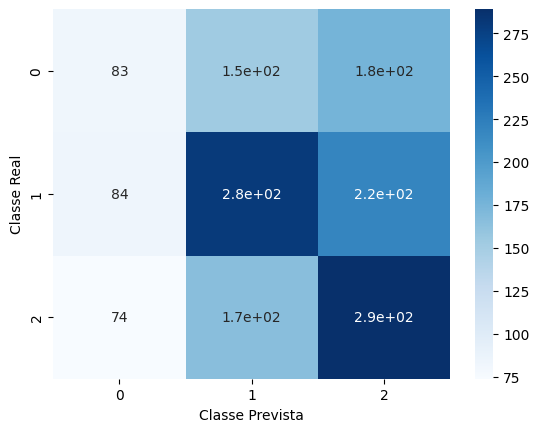

In [128]:
# testando modelo SVC
y_pred = model_svc.predict(X_test)

# printa a classificao dos resultados
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()


              precision    recall  f1-score   support

           0       0.28      0.27      0.27       412
           1       0.41      0.35      0.38       583
           2       0.37      0.44      0.40       529

    accuracy                           0.36      1524
   macro avg       0.35      0.35      0.35      1524
weighted avg       0.36      0.36      0.36      1524



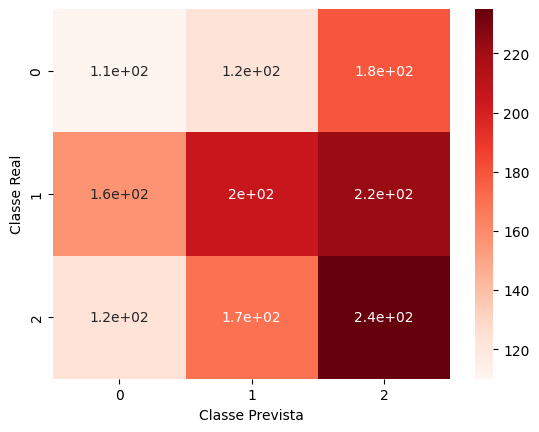

In [143]:
# testando o modelo kNN
knn_model.fit(X_train,y_train)
y_pd_knn = knn_model.predict(X_test)

print(classification_report(y_test, y_pd_knn))

cm = confusion_matrix(y_test, y_pd_knn)
sns.heatmap(cm, annot=True, cmap="Reds")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()


              precision    recall  f1-score   support

           0       0.29      0.32      0.31       412
           1       0.42      0.42      0.42       583
           2       0.36      0.33      0.34       529

    accuracy                           0.36      1524
   macro avg       0.36      0.36      0.36      1524
weighted avg       0.36      0.36      0.36      1524



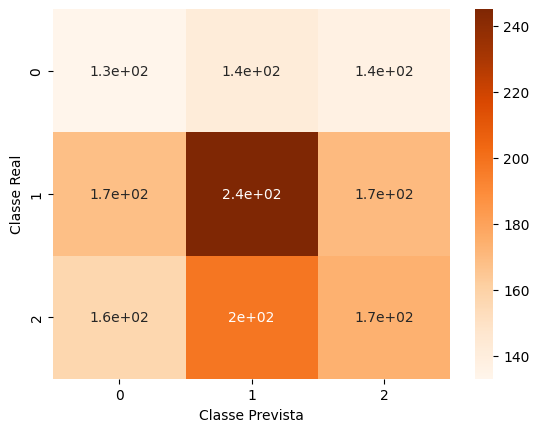

In [147]:
# testando o modelo de arvore de decisao
decision_tree_model.fit(X_train,y_train)
y_pd_tree = decision_tree_model.predict(X_test)

print(classification_report(y_test, y_pd_tree))

cm = confusion_matrix(y_test, y_pd_tree)
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

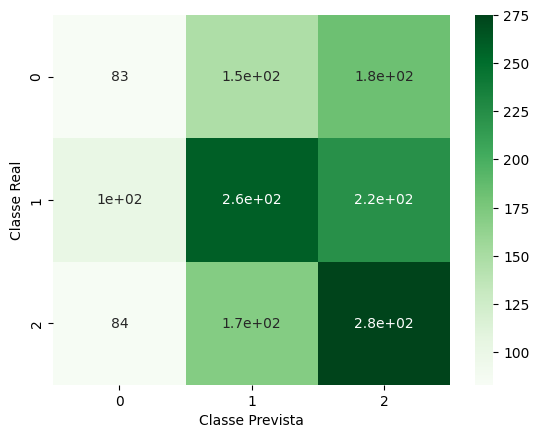

              precision    recall  f1-score   support

           0       0.31      0.20      0.24       412
           1       0.45      0.44      0.45       583
           2       0.40      0.52      0.45       529

    accuracy                           0.40      1524
   macro avg       0.39      0.39      0.38      1524
weighted avg       0.40      0.40      0.39      1524



In [146]:
# testando o modelo de classificao xgboost
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pd_class = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pd_class)
sns.heatmap(cm, annot=True, cmap="Greens")
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

print(classification_report(y_test, y_pd_class))

Testado os quatros modelos, daremos continuidade com o SVC pois foi o que apresentou melhores resultados.

In [132]:
# crio uma funcao para testar o resultando entre disputa de dois times
def previsao_times(mandante, visitante):
  # pega o id do time de entrada
  id_mandante = equipes[mandante] 
  id_visitante = equipes[visitante]
  
  # verifica se os times de entrada foram campeoes alguma vez, senao retorna 0
  campeao_mandante = campeoes.get(mandante) if campeoes.get(mandante) != None else 0
  campeao_visitante = campeoes.get(visitante) if campeoes.get(visitante) != None else 0

  # crio um array de dados com os dados necessarios para passar pro modelo. Dados do tipo float
  x = np.array([id_mandante, id_visitante, campeao_mandante, campeao_visitante]).astype('float64')
  # redimensiono o array x para transformalo em uma matriz unidimensional com uma linha
  # queremos saber a previsao para sobre um dado
  x = np.reshape(x, (1, -1))

  # a funcao predict_proba retorna a probabilidade para cada uma das classes
  # o [0] quer dizer somente a primeira linha da matriz de entrada x.
  y = model_svc.predict_proba(x)[0] # aplica o modelo na primeira linha da matriz x e retorn a probabilidade para a varial y
  # y[0] = probabilidade de dar empate pois 0 foi classificado como empate
  # y[1] = probabilidade do time mandante ganhar
  # y[2] = probabilidade do time visitante ganhar

  # texto retornando o resultado
  resultado = (mandante+ ' {}\n' +visitante+ ' {}\nEmpate {}').format(round(y[1]*100,2), round(y[2]*100,2), round(y[0]*100,2))
  return resultado


Exemplo prático: peguei 7 partidas do brasileirão 2020 da rodada 30/38
1. Palmeiras 1 x 1 Gremio
2. Fluminense 1 x 0 Sport
3. Vasco 0 x 1 Coritiba
4. Athletico-PR 1 x 1 São Paulo
5. Santos 2 x 1 Botafogo
6. Atlético MG 3 x 1 Atlétigo GO
7. Internacional 4 x 2 Fortaleza


In [133]:
resultado = previsao_times('Palmeiras','Gremio')
print(resultado)

Palmeiras 43.75
Gremio 31.16
Empate 25.09


In [134]:
resultado = previsao_times('Fluminense','Sport')
print(resultado)

Fluminense 46.54
Sport 27.06
Empate 26.4


In [135]:
resultado = previsao_times('Vasco','Coritiba')
print(resultado)

Vasco 28.68
Coritiba 44.78
Empate 26.53


In [136]:
resultado = previsao_times('Sao Paulo','Athletico-PR')
print(resultado)

Sao Paulo 45.58
Athletico-PR 29.0
Empate 25.42


In [137]:
resultado = previsao_times('Santos','Botafogo-RJ')
print(resultado)

Santos 45.49
Botafogo-RJ 27.62
Empate 26.89


In [138]:
resultado = previsao_times('Atletico-MG','Atletico-GO')
print(resultado)

Atletico-MG 45.54
Atletico-GO 27.29
Empate 27.18


In [139]:
resultado = previsao_times('Internacional','Fortaleza')
print(resultado)

Internacional 43.65
Fortaleza 28.13
Empate 28.22


1. Palmeiras 1 x 1 Gremio `ML: Palmeiras R: Empate`
2. Fluminense 1 x 0 Sport `ML: Fluminense R: Fluminense`
3. Vasco 0 x 1 Coritiba `ML: Coritiba R: Coritiba`
4. Athletico-PR 1 x 1 São Paulo `ML: São Paulo R: Empate`
5. Santos 2 x 1 Botafogo `ML: Santos R: Santos`
6. Atlético MG 3 x 1 Atlétigo GO `ML: Atlético MG R: Atlético MG`
7. Internacional 4 x 2 Fortaleza `ML: Internacional R: Internacional`

Ou seja, em uma amostra de 7 partidas aleatórias do campeonato de 2020 obtivemos uma acertividade de 5/7 = `70%`


Pegando um amostra de 2023 da rodada 6/38 temos:
1. Bahia 2 x 3 Flamengo
2. Fluminense 2 x 0 Cuiaba
3. Palmeiras 1 x 1 Bragantino
4. Atletico-MG 2 x 0 Internacional
5. Gremio 0 x 0 Fortaleza
6. Vasco 0 x 1 Santos
7. Corinthians 1 x 1 Sao paulo
8. Athletico-PR 3 x 2 Coritiba
9. Goias 2 x 1 Botafogo-RJ
10. America-MG 0 x 4 Cruzeiro

In [140]:
resultado = previsao_times('Bahia','Flamengo')
print(resultado)
print("\n")
resultado = previsao_times('Fluminense','Cuiaba')
print(resultado)
print("\n")
resultado = previsao_times('Palmeiras','Bragantino')
print(resultado)
print("\n")
resultado = previsao_times('Atletico-MG','Internacional')
print(resultado)
print("\n")
resultado = previsao_times('Gremio','Fortaleza')
print(resultado)
print("\n")
resultado = previsao_times('Vasco','Santos')
print(resultado)
print("\n")
resultado = previsao_times('Corinthians','Sao Paulo')
print(resultado)
print("\n")
resultado = previsao_times('Athletico-PR','Coritiba')
print(resultado)
print("\n")
resultado = previsao_times('Goias','Botafogo-RJ')
print(resultado)
print("\n")
resultado = previsao_times('America-MG','Cruzeiro')
print(resultado)
print("\n")

Bahia 28.12
Flamengo 45.65
Empate 26.23


Fluminense 45.32
Cuiaba 27.14
Empate 27.54


Palmeiras 45.38
Bragantino 27.99
Empate 26.63


Atletico-MG 38.97
Internacional 35.91
Empate 25.12


Gremio 44.34
Fortaleza 27.83
Empate 27.83


Vasco 27.52
Santos 45.81
Empate 26.68


Corinthians 33.49
Sao Paulo 39.44
Empate 27.07


Athletico-PR 34.9
Coritiba 40.93
Empate 24.17


Goias 42.99
Botafogo-RJ 29.87
Empate 27.14


America-MG 28.43
Cruzeiro 41.8
Empate 29.77




Como podemos ver ele acertou 7/10 70%
1. Bahia 2 x 3 Flamengo `ML: Flamengo R: Flamengo`
2. Fluminense 2 x 0 Cuiaba `ML: Fluminense R: Fluminense`
3. Palmeiras 1 x 1 Bragantino `ML: Palmeiras R: Empate`
4. Atletico-MG 2 x 0 Internacional `ML: Atletico-MG R: Atletico-MG`
5. Gremio 0 x 0 Fortaleza `ML: Gremio R: Empate`
6. Vasco 0 x 1 Santos `ML: Santos R: Santos`
7. Corinthians 1 x 1 Sao paulo `ML: Empate R: Empate`
8. Athletico-PR 3 x 2 Coritiba `ML: Coritiba R: Athletico-PR`
9. Goias 2 x 1 Botafogo-RJ `ML: Goias R: Goias`
10. America-MG 0 x 4 Cruzeiro `ML: Cruzeiro R: Cruzeiro`